In [1]:
from os import listdir
from os.path import isfile , join
import numpy as np
import pandas as pd
import string

In [2]:
my_path = '20_newsgroups'

#creating list of folder names to make valid pathnames later
folders = [f for f in listdir(my_path)]

In [3]:
folders

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
files = []
for folder_name in folders:
    folder_path  = join(my_path , folder_name)
    files.append([f for f in listdir(folder_path)])
    
    
for i in range(len(files)):
    print(len(files[i]))

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
997
1000
1000
1000
1000


In [5]:
#creating list of pathnames of all document which help in splitting dataset
# creating X
pathname_list = []
for i in range(len(folders)):
    for fi in files[i]:
        pathname_list.append(join(my_path , join(folders[i],fi)))

In [6]:
# making an array of the group from which the specific belongs to

Y = []
for folder_name in folders:
    folder_path = join (my_path , folder_name)
    num_of_files = len(listdir(folder_path))
    for i in range(num_of_files):
        Y.append(folder_name)

In [7]:
# splitting the data into train test

from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(pathname_list, Y, random_state=0, test_size=0.25)

In [8]:
print(len(X_train) , len(Y_train))
print(len(X_test) , len(Y_test))

14997 14997
5000 5000


In [9]:
#extraction of words from the document

#Step 1-create an array of stop words
#Remove puctuation from the word list

from nltk.corpus import stopwords
from string import punctuation

stopwords = list(stopwords.words('english'))
stopwords += list(punctuation)
stopwords +=  ['subject:','from:', 'date:', 'newsgroups:', 'message-id:', 'lines:', 'path:', 'organization:', 
            'would', 'writes:', 'references:', 'article', 'sender:', 'nntp-posting-host:', 'people', 
            'university', 'think', 'xref:', 'cantaloupe.srv.cs.cmu.edu', 'could', 'distribution:', 'first', 
            'anyone','world', 'really', 'since', 'right', 'believe', 'still', 'keywords','expires','approved'
            ,'archive','name','to:','or:','telephone:','fax:','reply-to:',"that's",'followup-to:',"we're",
            "let's", "what's","max>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'","going","using",]

In [10]:
#remove meta_data

def remove_metadata(text_lines):
    for i in range(len(text_lines)):
        if(text_lines[i] == '\n'):
            start = i+1
            break
    new_lines = text_lines[start:]
    return new_lines

In [11]:
#creating a dictionary of vocab which stores the count of unique feature words as value of there words

In [12]:
vocab = {}
X = []
for i in X_train:
    with open(i , "r") as f:
        text_lines = f.read()
        text_lines = remove_metadata(text_lines)
        X.append(text_lines)
        #print(text_lines)
        
        doc_words = []
        for word in text_lines.split():
            word_new  = word.lower()
            if word_new not in stopwords:  
                if word_new in vocab:
                    vocab[word_new]+=1
                else:
                    vocab[word_new]=1

In [13]:
!pip install WordCloud

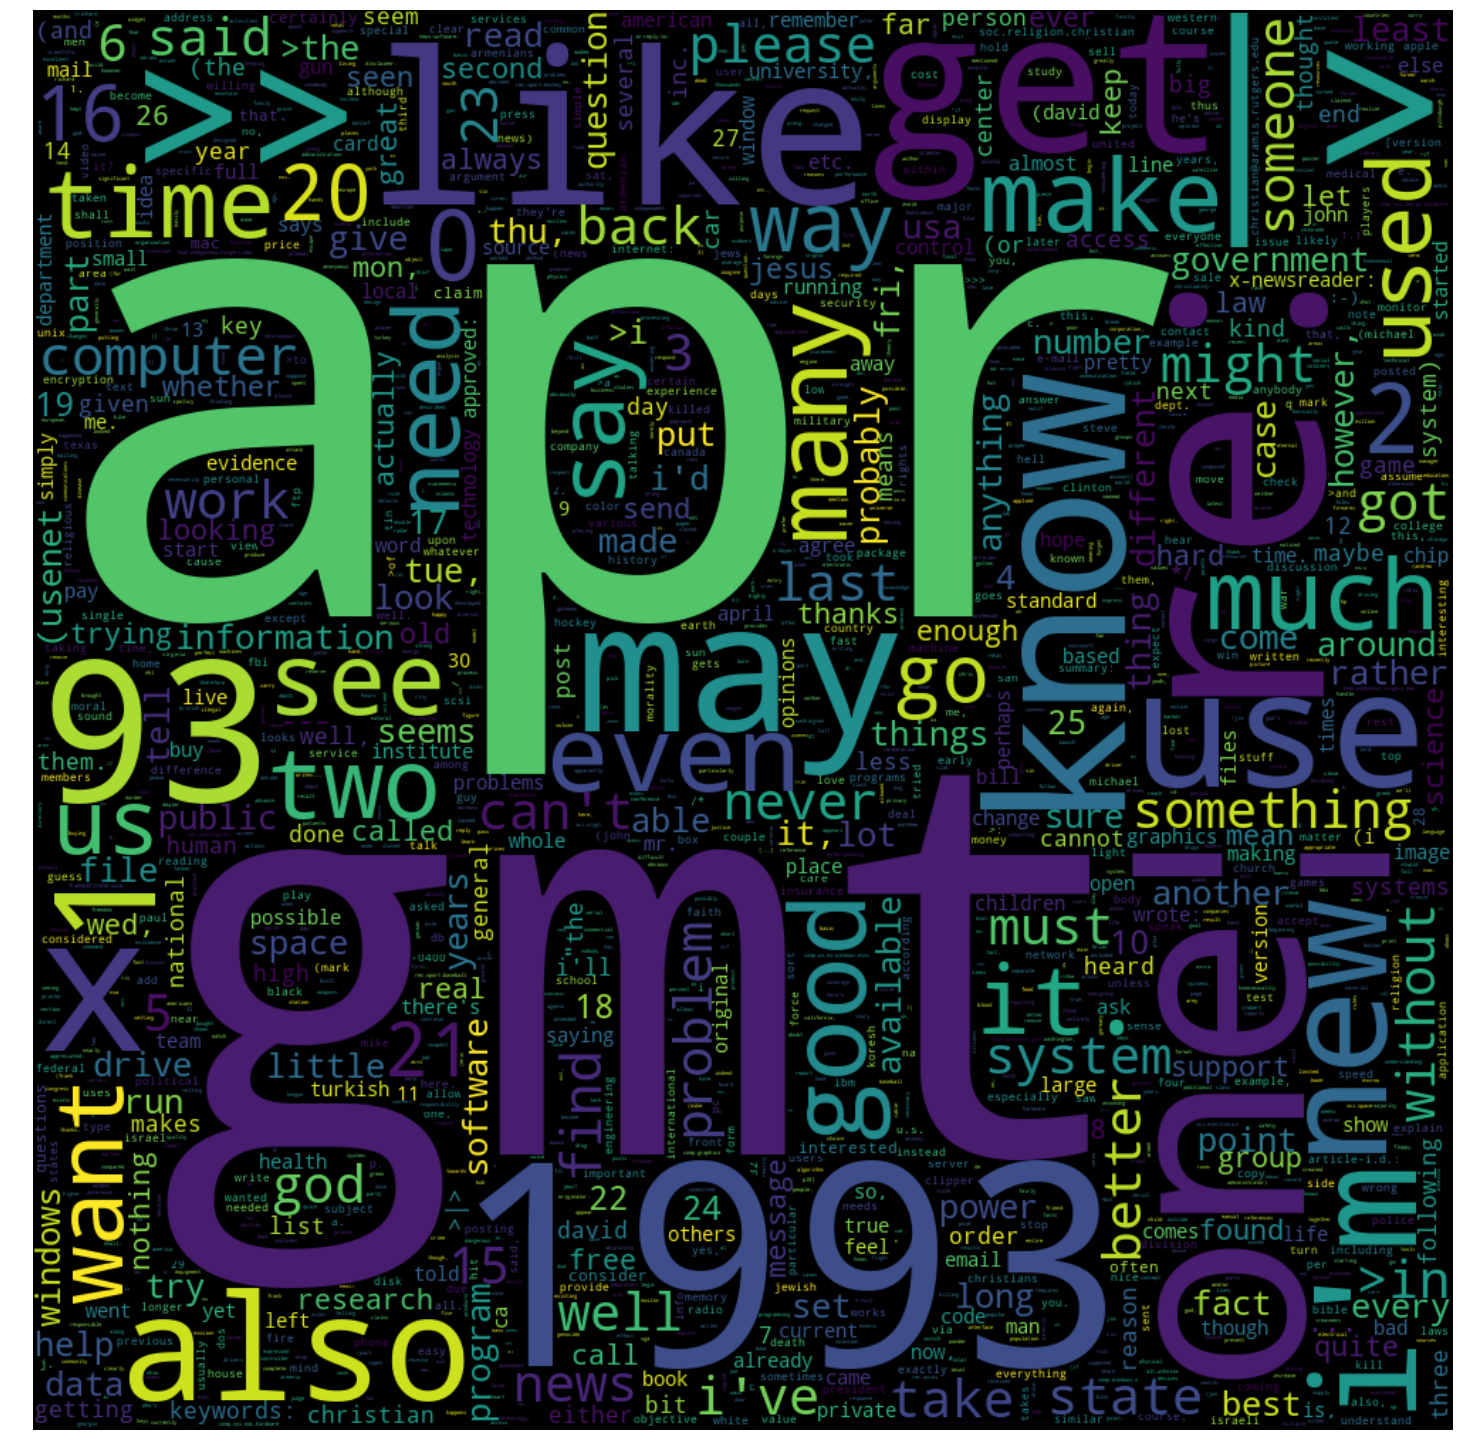

In [36]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color="Black",width=1000,height=1000, max_words=2000,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(vocab)
#plt.imshow(wc)
plt.figure(figsize=(20,20))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

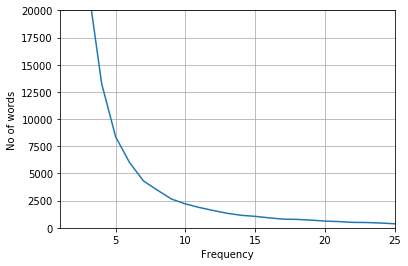

In [15]:
import matplotlib.pyplot as plt

#y-axis
size = max(vocab.values())+1
No_of_words = [0] * size
#x-axis
Word_frequency = [i for i in range(size)]
#create list of count of no of words with specific frequency
for i in vocab:
    No_of_words[vocab[i]] +=1

#plotting the graph    
plt.plot(Word_frequency,No_of_words)
plt.axis([1, 25, 0, 20000])
plt.xlabel("Frequency")
plt.ylabel("No of words")
plt.grid()
plt.show()

In [16]:
# itemgetter(1) takes the value of the key at index 1 (the count of the word at index 0 of current tuple) to sort the dictionary.
from operator import itemgetter 
vocab = dict(sorted(vocab.items(), key=itemgetter(1),reverse=True))

# After complete cleaning and removing stop words and meta data ,now training portion starts from here

In [17]:
#deciding the no. of words to use as feature
features = []
i = 0
K = 6000
for key in vocab:
    features.append(key)
    i += 1
    if i == K:
        break  

In [18]:
features

['apr',
 'gmt',
 '1993',
 're:',
 '--',
 'one',
 '|>',
 'like',
 'get',
 '93',
 '>>',
 'x',
 'know',
 'may',
 'use',
 'also',
 'new',
 "i'm",
 '1',
 'even',
 'good',
 'make',
 'many',
 'see',
 '2',
 'two',
 '0',
 'much',
 'time',
 'it.',
 'say',
 'want',
 'need',
 'us',
 'used',
 'way',
 'go',
 '20',
 '16',
 '21',
 'computer',
 'find',
 'something',
 'take',
 "i've",
 'might',
 'said',
 'please',
 'system',
 'god',
 '3',
 '15',
 'news',
 'never',
 'back',
 'last',
 "can't",
 'state',
 'must',
 '6',
 'without',
 'work',
 'got',
 'someone',
 '>in',
 'well',
 'better',
 '23',
 'problem',
 '5',
 'government',
 'another',
 'information',
 'read',
 'made',
 'usa',
 '4',
 '>the',
 'number',
 'sure',
 'things',
 'part',
 'come',
 '22',
 'help',
 'point',
 '>i',
 'tue,',
 'little',
 'give',
 'look',
 'fri,',
 'seems',
 'windows',
 'every',
 'file',
 'put',
 'data',
 '19',
 'probably',
 'years',
 'space',
 'set',
 'long',
 'question',
 'tell',
 '(usenet',
 'different',
 'around',
 'public',
 'av

In [19]:
#Representing training data as word vector count
X_train_dataset = np.zeros((len(X_train),len(features)))

In [20]:
for i in range(len(X)):
    # print(i) # Uncomment to see progress
    word_list = [ word.strip(string.punctuation).lower() for word in X[i].split()]
    for word in word_list:
        if word in features:
            X_train_dataset[i][features.index(word)] += 1

In [21]:
print(X_train_dataset)

[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]


In [22]:
Xtest = []
for i in X_test:
    with open(i , "r") as f:
        text_lines = f.read()
        text_lines = remove_metadata(text_lines)
        Xtest.append(text_lines)

In [23]:
print(Xtest[0])

From: Markku.Savela@tel.vtt.fi (Markku Savela)
Newsgroups: comp.windows.x
Subject: Raster and Text Widgets (View only!), Xew-1.3 version
Date: 17 Apr 1993 09:55:18 GMT
Organization: Technical Research Centre of Finland
Lines: 18
Distribution: comp
Message-ID: <1qok66$isa@tik.vtt.fi>
Reply-To: savela@tel.vtt.fi (Markku Savela)
NNTP-Posting-Host: tel4.tel.vtt.fi
Mime-Version: 1.0
Content-Type: text/plain; charset=iso-8859-1
Content-Transfer-Encoding: 8bit


Version 1.3 of Xew widgets is available at

	export.lcs.mit.edu: contrib/Xew-1.3.tar.Z
	export.lcs.mit.edu: contrib/Xew-1.3.README

For better details, check the README. (For extensive details, you have
to with Xew-1.1.ps.Z, still haven't had time to update this one).

No new functionality has been added since 1.2 version. Raster widget
handles now expose events slightly more intelligently than before
(really had to do this when I added a simple program that uses X11R5
Athena Porthole and Panner widgets). The program demo/viewer.c is


In [24]:
# To represent test data as word vector counts
X_test_dataset = np.zeros((len(X_test),len(features)))

In [25]:
for i in range(len(Xtest)):
    word_list = [ word.strip(string.punctuation).lower() for word in Xtest[i].split()]
    for word in word_list:
        if word in features:
            X_test_dataset[i][features.index(word)] += 1

In [26]:
print(len(X_train_dataset),len(Y_train))
print(len(X_test_dataset),len(X_test))

14997 14997
5000 5000


In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [28]:
clf = MultinomialNB()
clf.fit(X_train_dataset,Y_train)
Y_test_pred = clf.predict(X_test_dataset)
sklearn_score_train = clf.score(X_train_dataset,Y_train)
print("Sklearn's score on training data :",sklearn_score_train)
sklearn_score_test = clf.score(X_test_dataset,Y_test)
print("Sklearn's score on testing data :",sklearn_score_test)
print("Classification report for testing data :-")
print(classification_report(Y_test, Y_test_pred))

Sklearn's score on training data : 0.8819097152763886
Sklearn's score on testing data : 0.8318
Classification report for testing data :-
                          precision    recall  f1-score   support

             alt.atheism       0.73      0.79      0.76       233
           comp.graphics       0.73      0.75      0.74       253
 comp.os.ms-windows.misc       0.76      0.85      0.80       249
comp.sys.ibm.pc.hardware       0.74      0.80      0.77       240
   comp.sys.mac.hardware       0.79      0.87      0.83       236
          comp.windows.x       0.93      0.80      0.86       240
            misc.forsale       0.79      0.82      0.81       261
               rec.autos       0.86      0.88      0.87       269
         rec.motorcycles       0.87      0.93      0.90       284
      rec.sport.baseball       0.91      0.92      0.92       248
        rec.sport.hockey       0.96      0.93      0.94       231
               sci.crypt       0.94      0.89      0.92       233
    

In [29]:
# Implementing Multinomial Naive Bayes from scratch
class MultinomialNaiveBayes:
    
    def __init__(self):
        # count is a dictionary which stores several dictionaries corresponding to each news category
        # each value in the subdictionary represents the freq of the key corresponding to that news category 
        self.count = {}
        # classes represents the different news categories
        self.classes = None
    
    def fit(self,X_train,Y_train):
        # This can take some time to complete       
        self.classes = set(Y_train)
        for class_ in self.classes:
            self.count[class_] = {}
            for i in range(len(X_train[0])):
                self.count[class_][i] = 0
            self.count[class_]['total'] = 0
            self.count[class_]['total_points'] = 0
        self.count['total_points'] = len(X_train)
        
        for i in range(len(X_train)):
            for j in range(len(X_train[0])):
                self.count[Y_train[i]][j]+=X_train[i][j]
                self.count[Y_train[i]]['total']+=X_train[i][j]
            self.count[Y_train[i]]['total_points']+=1
    
    def __probability(self,test_point,class_):
        
        log_prob = np.log(self.count[class_]['total_points']) - np.log(self.count['total_points'])
        total_words = len(test_point)
        for i in range(len(test_point)):
            current_word_prob = test_point[i]*(np.log(self.count[class_][i]+1)-np.log(self.count[class_]['total']+total_words))
            log_prob += current_word_prob
        
        return log_prob
    
    
    def __predictSinglePoint(self,test_point):
        
        best_class = None
        best_prob = None
        first_run = True
        
        for class_ in self.classes:
            log_probability_current_class = self.__probability(test_point,class_)
            if (first_run) or (log_probability_current_class > best_prob) :
                best_class = class_
                best_prob = log_probability_current_class
                first_run = False
                
        return best_class
        
  
    def predict(self,X_test):
        # This can take some time to complete
        Y_pred = [] 
        for i in range(len(X_test)):
        # print(i) # Uncomment to see progress
            Y_pred.append( self.__predictSinglePoint(X_test[i]) )
        
        return Y_pred
    
    def score(self,Y_pred,Y_true):
        # returns the mean accuracy
        count = 0
        for i in range(len(Y_pred)):
            if Y_pred[i] == Y_true[i]:
                count+=1
        return count/len(Y_pred)

In [30]:
clf2 = MultinomialNaiveBayes()
clf2.fit(X_train_dataset,Y_train)


In [31]:
Y_test_pred = clf2.predict(X_test_dataset)
our_score_test = clf2.score(Y_test_pred,Y_test)  
print("Test Data Score :",our_score_test)

Test Data Score : 0.8318


In [32]:
print("Classification report for testing data :-")
print(classification_report(Y_test, Y_test_pred))

Classification report for testing data :-
                          precision    recall  f1-score   support

             alt.atheism       0.73      0.79      0.76       233
           comp.graphics       0.73      0.75      0.74       253
 comp.os.ms-windows.misc       0.76      0.85      0.80       249
comp.sys.ibm.pc.hardware       0.74      0.80      0.77       240
   comp.sys.mac.hardware       0.79      0.87      0.83       236
          comp.windows.x       0.93      0.80      0.86       240
            misc.forsale       0.79      0.82      0.81       261
               rec.autos       0.86      0.88      0.87       269
         rec.motorcycles       0.87      0.93      0.90       284
      rec.sport.baseball       0.91      0.92      0.92       248
        rec.sport.hockey       0.96      0.93      0.94       231
               sci.crypt       0.94      0.89      0.92       233
         sci.electronics       0.83      0.79      0.81       244
                 sci.med       0.

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(Y_test,Y_test_pred)
print(cm)

[[184   1   0   0   0   0   0   0   5   0   0   0   0   3   0   3   2   1
    3  31]
 [  1 191  25  11   8   6   3   2   0   1   0   0   3   1   1   0   0   0
    0   0]
 [  0  12 211  12   2   5   2   0   0   1   0   1   1   0   2   0   0   0
    0   0]
 [  0   6   9 191  16   2   9   3   0   0   0   1   3   0   0   0   0   0
    0   0]
 [  0   0   5  12 206   0   7   1   0   0   0   0   5   0   0   0   0   0
    0   0]
 [  0  22  11   1   4 193   3   1   0   0   0   1   4   0   0   0   0   0
    0   0]
 [  0   1   1  12   2   0 215   8   3   1   1   2  11   0   3   0   0   0
    1   0]
 [  0   2   1   1   2   1   7 237   7   1   1   0   4   1   1   0   2   0
    0   1]
 [  0   0   2   0   1   0   6   5 265   1   0   0   1   0   0   0   2   0
    1   0]
 [  1   2   0   0   1   0   4   2   1 229   5   0   0   0   0   0   1   0
    2   0]
 [  0   0   1   0   0   0   0   0   2  11 214   0   1   0   0   0   0   0
    1   1]
 [  0   4   4   0   3   1   0   0   1   0   0 208   1   1   1   0

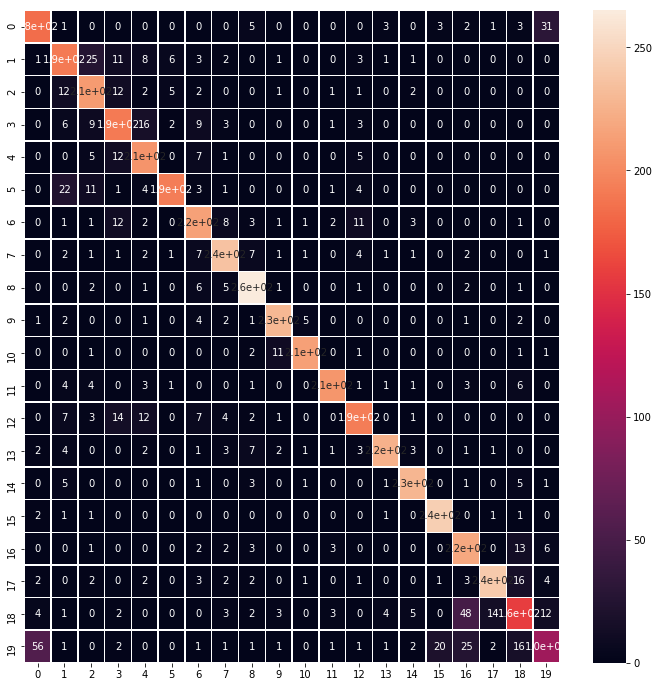

In [35]:
import seaborn as sns
fig , ax = plt.subplots(figsize=(12,12))
sns.heatmap(cm,annot=True, linewidths=.5, ax=ax)

# Conclusion

The Naive Bayes algorithm that was implemented from scratch was found to have an f1 score of 0.83 which is the same as the sklearn multinomial Naive Bayes algorithm. The in-built sklearn implementation had coefficient of determination (score) = 0.83